# **Introdução**
Mercado de Ações - Utilizei como source uma base de dados própria que mantenho em outro projeto pessoal, aonde coleto dados diariamente da bolsa americana NASDAQ. Para efeitos didáticos e de simplificação, disponibilizei apenas as cotações do período entre ***01-10-2018 e 15-10-2018*** e do ativo ***AMD*** ([https://www.amd.com/en](https://www.amd.com/en)).

Esta análise tem como objetivo gerar um método de visualização gráfica simples e funcional para as quotações diárias de um ativo da bolsa, mostrando a evolução do preço ao longo do(s) periodo(s) e assim evidenciar potenciais relações ou comportamentos que ele venha apresentar ao ter seus indicadores comparados.

## **URL do Dataset**

https://s3-sa-east-1.amazonaws.com/danielabraao-01/quotes-AMD-01-to-15-OUT-2018.csv

## **Etapas do Desenvolvimento**

 - Obtenção, validação e limpeza do dataset
 - Construção do recurso para seleção de data e range de horário
 - Indexação e preparação dos dados para melhor utilização ao longo da análise
 - Montagem dos gráficos básicos (evolução do preço, evolução do volume e relacionamento preço vs volume)
 - Aperfeiçoamento dos gráficos (inclusão de linha de tendência, médias móveis, legenda, etc)
 - Documentação e conclusão

## **Desdobramento e código fonte**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
%matplotlib inline

In [206]:
# carrega o dataset
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/danielabraao-01/quotes-AMD-01-to-15-OUT-2018.csv', index_col=0)

In [363]:
# imprime dataframe para validação
# print df

In [366]:
# declara variaveis principais  
date = "2018-10-10"
start_time = "09:30:00"
stop_time = "10:30:00"
ticker = "AMD"
metadata = "%s %s" % (date, ticker)

In [376]:
# indexa e prepara os dados para utilização
df_by_date = df.loc[date]
df_by_time = df
df_by_time['count'] = df_by_time.index
df_by_time = df_by_date.set_index('rtquotetime')
df_by_time = df_by_time.loc[start_time:stop_time]
df_by_time['rtquotetime'] = df_by_time.index

## **Gráfico de evolução do preço**

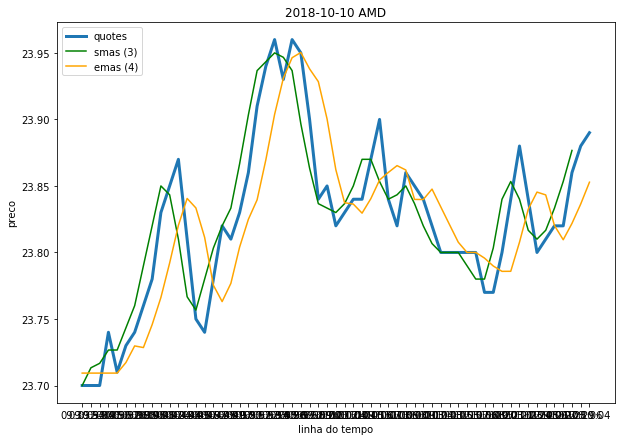

In [406]:
# plota primeiro grafico basico de evolução dos preços
plt.figure(figsize=(10, 7))
plt.title(metadata)
plt.plot(df_by_time['rtqlast'], markevery=100, label='quotes', linewidth=3) 

# plota gráficos de médias móveis simples - são dois, com janelas diferentes
window = 3
values = df_by_time['rtqlast']
weights = np.repeat(1.0, window) / window
smas = np.convolve(values,weights,'valid')
plt.plot(smas, color='Green', label='smas (3)')

# plota gráficos de médias móveis exponenciais
window = 4
weights = np.exp(np.linspace(-1., 0., window))
weights /= weights.sum()
emas =  np.convolve(values, weights, mode='full')[:len(values)]
emas[:window] = emas[window]
plt.plot(emas, color='Orange', label='emas (4)') 

plt.ylabel("preco")
plt.xlabel("linha do tempo")
plt.legend(loc='upper left')
plt.show()

## **Gráfico de evolução do volume**

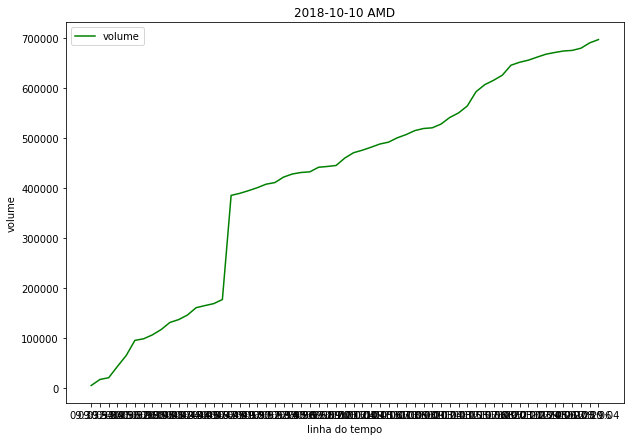

In [408]:
# plota gráfico evolutivo do volume de transações
plt.figure(figsize=(10, 7))
plt.plot(df_by_time['rtqvolu'], color='Green', label='volume')    
plt.title(metadata)
plt.ylabel("volume")
plt.xlabel("linha do tempo")
plt.legend(loc='upper left')
plt.show()

## **Gráfico de relação Preço x Volume**

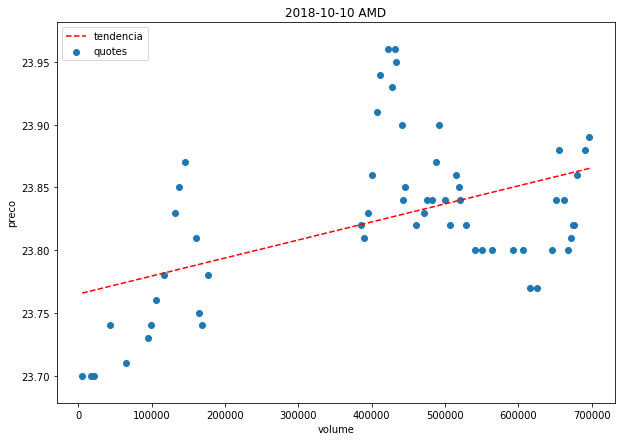

In [386]:
# plota gráfico scatter comparando preço x volume e traça linha de tendência
plt.figure(figsize=(10, 7))
plt.title(metadata)
x = df_by_time['rtqvolu']
y = df_by_time['rtqlast']
plt.scatter(x=x, y=y, label='quotes')      

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--", label='tendencia')

plt.ylabel("preco")
plt.xlabel("volume")
plt.legend(loc='upper left')
plt.show()

## **Características da série de cotações**

In [387]:
# imprime descrição da série de últimos preços
df_by_time['rtqlast'].describe()

count    59.000000
mean     23.824746
std       0.063283
min      23.700000
25%      23.800000
50%      23.820000
75%      23.860000
max      23.960000
Name: rtqlast, dtype: float64

# **Conclusões**

**Gráfico de evolução do preço** - Funcinou dentro do esperado, em instantes é possível visualizar a evolução dos preços em um período parcial ou completo do dia. ao adicionar as médias movieis o grafico ficou ainda mais útil e atraente.

**Gráfico de volume** - Funcinou dentro do esperado, é possivel observar os picos de valores de volume ao longo do período. um fato observado foi que o dataset traz em cada linha de cotação o valor acumulado do volume no período, ou seja, a somatória do anterior mais o último, e não o valor individual por cotação.

**Relação Preço x Volume** - Fica evidente que existe uma relação entre o volume e o preço, porém na forma que os dados estão apresentados na base de dados, não existe evidência concreta garantido que os dois caminham juntos em movimentos de alta e baixa.

O campo volume neste caso é cumulativo, ou seja, em cada cotação existirá um acréscimo sobre a quantidade apresentada na cotacão anterior, desta forma o volume será sempre crescente. Para que tenhamos uma visão mais concreta sobre essa relação, seria necessário gerar uma coluna adicional de volume contemplando o valor da diferença (ou quantidade acrescida por cotação) e não o acumulado, desta forma poderíamos verificar, por exemplo, se montantes de volume maior sendo acrescentados significa também maior variação no preço. este pode ser um exercicio evolutivo para outra analise.

## **Exercício sugerido**

1.  Carregar o dataset diretamente via URL.
2.  Criar um mecanismo de gráfico simples para mostrar a evolução do preço durante o dia.
3.  Criar um gráfico simples com a evolução do preço ao longo do range de datas de todo dataset.